# Task 1: Implement a SIR model to simulate Covid-19 spreading

In [362]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
!pip install mpld3
import mpld3
mpld3.enable_notebook()

In [363]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

## 1.1 Examplary execution

In [364]:
N = 1000
beta = 1.0  # infected person infects 1 other person per day
D = 4.0 # infections lasts four days
gamma = 1.0 / D

S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible

In [365]:
t = np.linspace(0, 49, 50) # Grid of time points (in days)
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

In [366]:
def plotsir(t, S, I, R,path):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  #ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.savefig(path)
  plt.show()
  files.download(path) ;

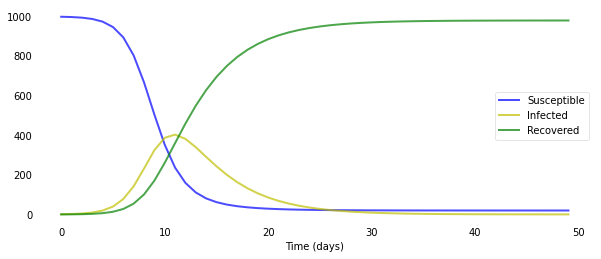

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [367]:
from google.colab import files
plotsir(t, S, I, R,"basicSIR.png")


In [368]:
N = 1000
beta = 3.0  # infected person infects 1 other person per day
D = 4.0 # infections lasts four days
gamma = 1.0 / D

S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
t = np.linspace(0, 49, 50) # Grid of time points (in days)
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

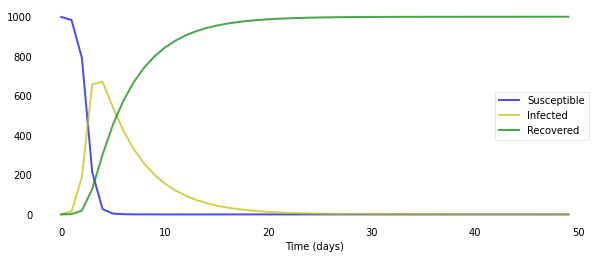

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [369]:
from google.colab import files
plotsir(t, S, I, R,"basicSIRdouble.png")


In [370]:
N = 1000
beta = 1.0  # infected person infects 1 other person per day
D = 8.0 # infections lasts four days
gamma = 1.0 / D

S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
t = np.linspace(0, 49, 50) # Grid of time points (in days)
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

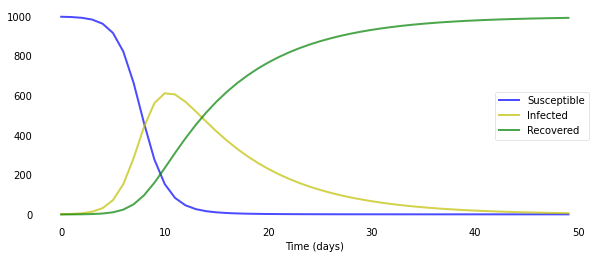

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [371]:
from google.colab import files
plotsir(t, S, I, R,"basicSIRgamma.png")

# Task 2: Extend the model, as described in the project proposal

In [372]:

from scipy.integrate import odeint
import numpy as np
from matplotlib import gridspec
import matplotlib.pyplot as plt
!pip install mpld3
import mpld3
mpld3.enable_notebook()

In [373]:
def plotseird(t, S, E, I, R, D=None, L=None, R0=None, Alpha=None, CFR=None):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  if D is not None:
    ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
    ax.plot(t, S+E+I+R+D, 'c--', alpha=0.7, linewidth=2, label='Total')
  else:
    ax.plot(t, S+E+I+R, 'c--', alpha=0.7, linewidth=2, label='Total')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  #ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend(borderpad=2.0)
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  if L is not None:
      plt.title("Lockdown after {} days".format(L))
  plt.show();

  plt.savefig('gender_age_smoking.png')
  files.download('gender_age_smoking.png')

  if R0 is not None or CFR is not None:
    f = plt.figure(figsize=(12,4))
  
  if R0 is not None:
    # sp1
    ax1 = f.add_subplot(121)
    ax1.plot(t, R0, 'b--', alpha=0.7, linewidth=2, label='R_0')

    ax1.set_xlabel('Time (days)')
    ax1.title.set_text('R_0 over time')
    # ax.set_ylabel('Number (1000s)')
    # ax.set_ylim(0,1.2)
    ax1.yaxis.set_tick_params(length=0)
    ax1.xaxis.set_tick_params(length=0)
    #ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax1.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)

  if Alpha is not None:
    # sp2
    ax2 = f.add_subplot(122)
    ax2.plot(t, Alpha, 'r--', alpha=0.7, linewidth=2, label='alpha')

    ax2.set_xlabel('Time (days)')
    ax2.title.set_text('fatality rate over time')
    # ax.set_ylabel('Number (1000s)')
    # ax.set_ylim(0,1.2)
    ax2.yaxis.set_tick_params(length=0)
    ax2.xaxis.set_tick_params(length=0)
    #ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax2.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)

    plt.show();

## 2.1 Include Exposed-Compartment

In [374]:
def deriv(y, t, N, beta, gamma, delta):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

## 2.2 New parameter for the incubation period (delta)

In [375]:
N = 1_000_000
D = 4.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days
R_0 = 5.0
beta = R_0 * gamma  # R_0 = beta / gamma, so beta = R_0 * gamma
S0, E0, I0, R0 = N-1, 1, 0, 0  # initial conditions: one exposed

In [376]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta))
S, E, I, R = ret.T

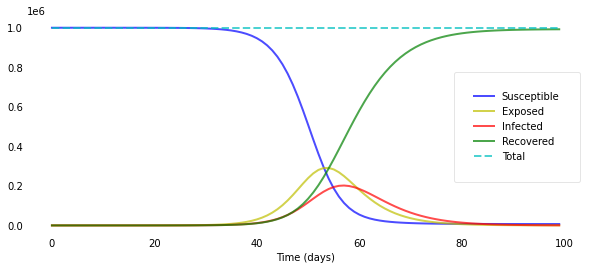

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [377]:
plotseird(t, S, E, I, R)

## 2.3 Include Dead-Component

In [378]:
def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I # Recovered Component
    dDdt = alpha * rho * I #Death Component
    return dSdt, dEdt, dIdt, dRdt, dDdt

## 2.3.1 New parameter for the likelihood of death (alpha) and the average time from infection until death (rho)

In [379]:
N = 1_000_000
D = 4.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days
R_0 = 5.0
beta = R_0 * gamma  # R_0 = beta / gamma, so beta = R_0 * gamma
alpha = 0.2  # 20% death rate
rho = 1/9  # 9 days from infection until death
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed

In [380]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T


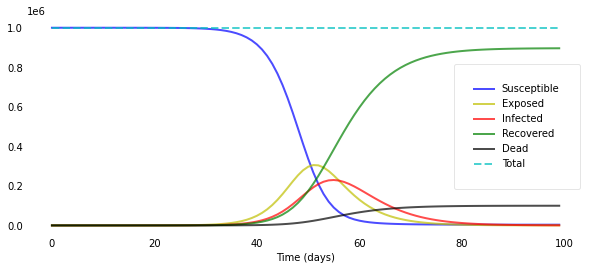

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [381]:
plotseird(t, S, E, I, R, D)

### 2.4.1 Age-Dependent Fatality Rate (+ already included time-dependancy)

In [382]:
def deriv(y, t, N, beta, gamma, delta, alpha_opt, rho):
    S, E, I, R, D = y
    def alpha(t):
        return s * I/N + alpha_opt

    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha(t)) * gamma * I - alpha(t) * rho * I
    dRdt = (1 - alpha(t)) * gamma * I
    dDdt = alpha(t) * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [383]:
N = 1_000_000
D = 4.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days

# age integrated
alpha_by_agegroup = {"0-29": 0.01, "30-59": 0.05, "60-89": 0.2, "89+": 0.3}
proportion_of_agegroup = {"0-29": 0.1, "30-59": 0.3, "60-89": 0.4, "89+": 0.2}
s = 0.01
alpha_opt = sum(alpha_by_agegroup[i] * proportion_of_agegroup[i] for i in list(alpha_by_agegroup.keys()))
print(alpha_opt)

R_0_start, k, x0, R_0_end = 5.0, 0.5, 50, 0.5

def logistic_R_0(t):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def beta(t):
    return logistic_R_0(t) * gamma

rho = 1/9  # 9 days from infection until death
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed

0.15600000000000003


In [384]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha_opt, rho))
S, E, I, R, D = ret.T
R0_over_time = [logistic_R_0(i) for i in range(len(t))]  # to plot R_0 over time: get function values
Alpha_over_time = [s * I[i]/N + alpha_opt for i in range(len(t))]  # to plot alpha over time

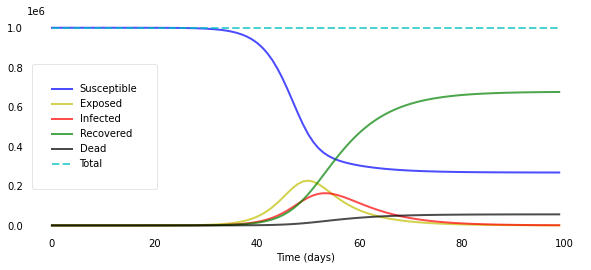

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

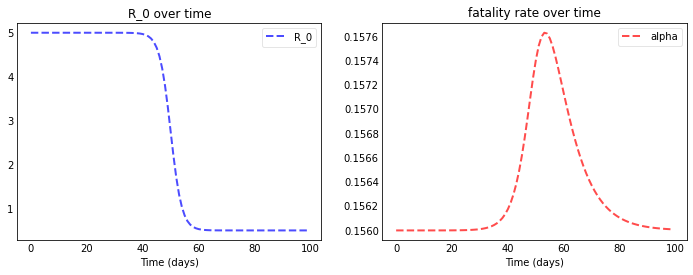

In [385]:

plotseird(t, S, E, I, R, D, R0=R0_over_time, Alpha=Alpha_over_time)


## 2.4 Include impact of AGE, SMOKING and GENDER on the fetality rate




In [386]:
def deriv(y, t, N, beta, delta, inf_to_rec_d, inf_to_dead_p, inf_to_dead_d):
    S, E, I, R, D = y
    def alpha(t):
        a = s * I/N + inf_to_crit_p
        # print(a)
        return a
        
    
    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - d_r_calc(I) * inf_to_dead_d * I - (1 - d_r_calc(I)) * inf_to_rec_d * I
    dRdt = (1 - d_r_calc(I)) * inf_to_rec_d * I
    dDdt = d_r_calc(I) * inf_to_dead_d * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [387]:
N = 1_000_000
D = 4 # infections lasts four days
inf_to_rec_d = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days
ICU_BEDS = 10000
# age integrated
alpha_by_agegroup = {"0-29": 0.001, "30-59": 0.013, "60-89": 0.2267, "89+": 0.285}
proportion_of_agegroup = {"0-29": 0.301, "30-59": 0.4151, "60-89": 0.2813, "89+": 0.027342809}
s = 0.01
alpha_opt_age_only = sum(alpha_by_agegroup[i] * proportion_of_agegroup[i] for i in list(alpha_by_agegroup.keys()))
print('Deathrate including age:\n', alpha_opt_age_only, '\n\n')

# smoking (+ age) integrated 
alpha_by_agegroup_and_smoking = {"smoking_0-29": 0.001*2.4, "not_smoking_0-29": 0.001, "smoking_30-59": 0.013*2.4, "not_smoking_30-59": 0.013, "smoking_60-89": 0.2267*2.4, "not_smoking_60-89": 0.2267, "not_smoking_89+": 0.285} #source: https://www.thelancet.com/journals/lanres/article/PIIS2213-2600(20)30234-4/fulltext
proportion_of_agegroup_and_smoking = {"smoking_0-29": 0.1*0.3195, "not_smoking_0-29": 0.1*0.6805, "smoking_30-59": 0.3*0.26375, "not_smoking_30-59": 0.3*0.73625, "smoking_60-89": 0.4*0.0845, "not_smoking_60-89": 0.4*0.9155, "not_smoking_89+": 0.2} # source http://www.gbe-bund.de/pdf/DEGS1_Verbreitung_Rauchen_E.pdf
s = 0.01
alpha_opt_age_smoking = sum(alpha_by_agegroup_and_smoking[i] * proportion_of_agegroup_and_smoking[i] for i in list(alpha_by_agegroup_and_smoking.keys()))
print('Deathrate including age + smoking:\n', alpha_opt_age_smoking, '\n\n')

# gender integrated 
recovery_multiplicator_by_gender_group = {"male": 0.486/0.5, "female": 0.514/0.5} #source: https://www.clinicalmicrobiologyandinfection.com/article/S1198-743X(20)30217-2/fulltext
proportions_of_gender_groups = {"male": 0.493495543, "female": 0.506504457} #source: statista.com (from 2018)
s = 0.01
rec_gender_multiplicator = sum(recovery_multiplicator_by_gender_group[i] * proportions_of_gender_groups[i] for i in list(recovery_multiplicator_by_gender_group.keys()))
death_rate_multiplicator = 2 - rec_gender_multiplicator

inf_to_dead_p = alpha_opt_age_smoking * death_rate_multiplicator
inf_to_dead_d = 1/50  # 9 days from infection until death
print('Deathrate including age + smoking + gender:\n', inf_to_dead_p)


R_0_start, k, x0, R_0_end = 5.0, 0.5, 50, 0.5


S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed

Deathrate including age:
 0.07726071056500002 


Deathrate including age + smoking:
 0.16389224900000002 


Deathrate including age + smoking + gender:
 0.1638325513151698


In [388]:
def logistic_R_0(t):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def beta(t):
    return logistic_R_0(t) * inf_to_rec_d
def d_r_calc(t):
  return 0.6 if t*0.17 * 0.48 > ICU_BEDS else inf_to_dead_p #Hospitalisation 


In [389]:
print(beta(1))

1.2499999999742406


In [390]:
days = 100
t = np.linspace(0, 99, days) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, delta, inf_to_rec_d, inf_to_dead_p, inf_to_dead_d))
S, E, I, R, D = ret.T

R0_over_time = [logistic_R_0(i) for i in range(len(t))]  # to plot R_0 over time: get function values
Alpha_over_time = [s * I[i]/N + alpha_opt_age_smoking for i in range(len(t))]  # to plot alpha over time
d_rates_over_time = [d_r_calc(t) for t in I] 
# print(I.tolist())
# Gamma_over_time = [I[i] * (gamma_init * rec_gender_multiplicator) for i in range(len(t))]

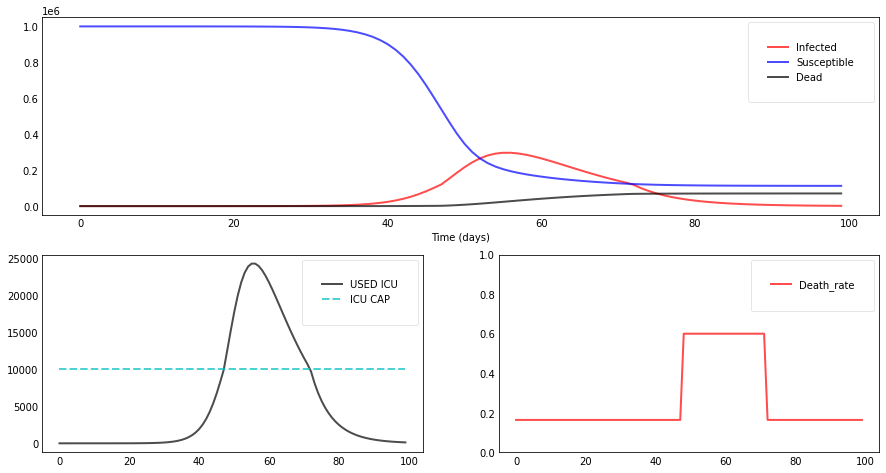

In [391]:
#f, ax = plt.subplots(3, figsize=(15,4))
fig = plt.figure( figsize=(15,8)) 
gs =gridspec.GridSpec(2, 2) 

ax0 = fig.add_subplot(gs[0,:])
ax0.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
ax0.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
ax0.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
ax0.set_xlabel('Time (days)')

ax0.yaxis.set_tick_params(length=0)
ax0.xaxis.set_tick_params(length=0)
#ax0.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax0.legend(borderpad=2.0)
legend.get_frame().set_alpha(0.5)


ax1 = fig.add_subplot(gs[1,0])
ax1.plot(t, I*0.17 * 0.48, 'k', alpha=0.7, linewidth=2, label='USED ICU')
ax1.plot(t, [ICU_BEDS for _ in range(len(I))], 'c--', alpha=0.7, linewidth=2, label='ICU CAP')
ax1.yaxis.set_tick_params(length=0)
ax1.xaxis.set_tick_params(length=0)
#ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax1.legend(borderpad=2.0)
legend.get_frame().set_alpha(0.5)

ax2 = fig.add_subplot(gs[1,1])
ax2.plot(t, d_rates_over_time, 'r', alpha=0.7, linewidth=2, label='Death_rate')
ax2.yaxis.set_tick_params(length=0)
ax2.xaxis.set_tick_params(length=0)
ax2.set_ylim([0,1])
#ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax2.legend(borderpad=2.0)
legend.get_frame().set_alpha(0.5)

plt.show()



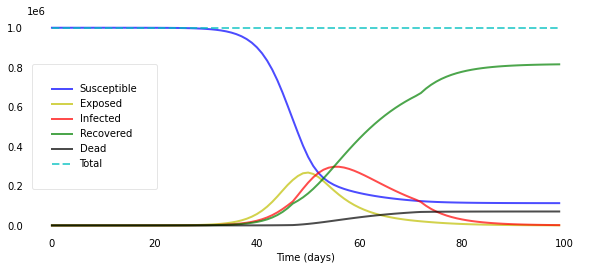

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

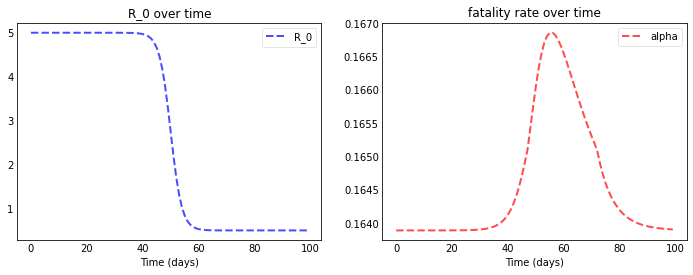

In [392]:

plotseird(t, S, E, I, R, D, R0=R0_over_time, Alpha=Alpha_over_time) #Gamma=Gamma_over_time

## 2.5 Include availability of hospital beds

In [393]:
import pandas as pd

In [394]:
inf_to_icu = 0.17 * 0.48 # https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Situationsberichte/2020-04-29-en.pdf?__blob=publicationFile // https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Steckbrief.html (section "Anteil der Hospitalisierten mit Beatmungspflichtigkeit")

beds = pd.read_csv("https://raw.githubusercontent.com/hf2000510/infectious_disease_modelling/master/data/beds.csv", header=0)
beds_lookup = dict(zip(beds["Country"], beds["ICU_Beds"]))
beds_per_100k_germany = beds_lookup["Germany"]

In [395]:
print(beds_per_100k_germany)

29.2


In [396]:
pop_germany= 83_754_315 #source: https://www.worldometers.info/world-population/germany-population/

#3: Fit the model to real-world data, Germany

Imports

In [397]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

from scipy.integrate import odeint
!pip install lmfit
import lmfit
from lmfit.lineshapes import gaussian, lorentzian

import warnings
warnings.filterwarnings('ignore')

Supplemental and Coronavirus Data

In [398]:
agegroups = pd.read_csv("https://raw.githubusercontent.com/hf2000510/infectious_disease_modelling/master/data/agegroups.csv")
agegroup_lookup = dict(zip(agegroups['Location'], agegroups[['0_9', '10_19', '20_29', '30_39', '40_49', '50_59', '60_69', '70_79', '80_89', '90_100']].values))
covid_data = pd.read_csv("https://tinyurl.com/t59cgxn", parse_dates=["Date"], skiprows=[1])
#covid_data[['Date']]

In [399]:
inf_to_rec_d = 1.0/4.0
delta = 1.0/5.0
def logistic_R_0(t, R_0_start, k, x0, R_0_end):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end
def Model(days, agegroups, R_0_start, k, x0, R_0_end, inf_to_dead_p):

    def beta(t):
        return logistic_R_0(t, R_0_start, k, x0, R_0_end) * inf_to_rec_d

    N = sum(agegroups)
    
    y0 = N-1.0, 1.0, 0.0, 0.0, 0.0
    t = np.linspace(0, days-1, days)
    ret = odeint(deriv, y0, t, args=(N, beta, delta, inf_to_rec_d, inf_to_dead_p, inf_to_dead_d))
    S, E, I, R, D = ret.T
    R_0_over_time = [beta(i)/inf_to_rec_d for i in range(len(t))]

    return t, S, E, I, R, D, R_0_over_time

In [400]:
plt.gcf().subplots_adjust(bottom=0.15)

def plotter(ICU_BEDS, t, S, E, I, R, D, R_0, x_ticks=None):
    f, ax = plt.subplots(1,1,figsize=(20,4))
    if x_ticks is None:
        # ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
        ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
        ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
        ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
        ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
    else:
        # ax.plot(x_ticks, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
        ax.plot(x_ticks, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
        ax.plot(x_ticks, I, 'r', alpha=0.7, linewidth=2, label='Infected')
        ax.plot(x_ticks, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
        ax.plot(x_ticks, D, 'k', alpha=0.7, linewidth=2, label='Dead')

        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_minor_locator(mdates.MonthLocator())
        f.autofmt_xdate()


    ax.title.set_text('extended SEIR-Model')

   # ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)

    plt.show();
    
    f = plt.figure(figsize=(20,4))
    # sp1
    ax1 = f.add_subplot(151)
    if x_ticks is None:
        ax1.plot(t, R_0, 'b--', alpha=0.7, linewidth=2, label='R_0')
    else:
        ax1.plot(x_ticks, R_0, 'b--', alpha=0.7, linewidth=2, label='R_0')
        ax1.xaxis.set_major_locator(mdates.YearLocator())
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax1.xaxis.set_minor_locator(mdates.MonthLocator())
        f.autofmt_xdate()
    ax1.title.set_text('R_0 over time')
    #ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax1.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    
    # sp2
    ax2 = f.add_subplot(152)
    total_CFR = [0] + [100 * D[i] / sum(delta*E[:i]) if sum(delta*E[:i])>0 else 0 for i in range(1, len(t))]
    daily_CFR = [0] + [100 * ((D[i]-D[i-1]) / ((R[i]-R[i-1]) + (D[i]-D[i-1]))) if max((R[i]-R[i-1]), (D[i]-D[i-1]))>10 else 0 for i in range(1, len(t))]
    if x_ticks is None:
        ax2.plot(t, total_CFR, 'r--', alpha=0.7, linewidth=2, label='total')
        ax2.plot(t, daily_CFR, 'b--', alpha=0.7, linewidth=2, label='daily')
    else:
        ax2.plot(x_ticks, total_CFR, 'r--', alpha=0.7, linewidth=2, label='total')
        ax2.plot(x_ticks, daily_CFR, 'b--', alpha=0.7, linewidth=2, label='daily')
        ax2.xaxis.set_major_locator(mdates.YearLocator())
        ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax2.xaxis.set_minor_locator(mdates.MonthLocator())
        f.autofmt_xdate()

    ax2.title.set_text('Fatality Rate (%)')
    #ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax2.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)

    # sp3
    ax3 = f.add_subplot(153)
    newDs = [0] + [D[i]-D[i-1] for i in range(1, len(t))]
    if x_ticks is None:
        ax3.plot(t, newDs, 'r--', alpha=0.7, linewidth=2, label='total')
    else:
        ax3.plot(x_ticks, newDs, 'r--', alpha=0.7, linewidth=2, label='total')
        ax3.xaxis.set_major_locator(mdates.YearLocator())
        ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax3.xaxis.set_minor_locator(mdates.MonthLocator())
        f.autofmt_xdate()

    ax3.title.set_text('Deaths per day')
    ax3.yaxis.set_tick_params(length=0)
    ax3.xaxis.set_tick_params(length=0)
   # ax3.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax3.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    #sp4        
    ax4 = f.add_subplot(154)
    if x_ticks is None:
      ax4.plot(t, I*0.17 * 0.48, 'k', alpha=0.7, linewidth=2, label='USED ICU')
      ax4.plot(t, [ICU_BEDS for _ in range(len(I))], 'c--', alpha=0.7, linewidth=2, label='ICU CAP')
    else:
      ax4.plot(x_ticks, I*0.17 * 0.48, 'k', alpha=0.7, linewidth=2, label='USED ICU')
      ax4.xaxis.set_major_locator(mdates.YearLocator())
      ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
      ax4.xaxis.set_minor_locator(mdates.MonthLocator())
      f.autofmt_xdate()      
    ax4.title.set_text('USED ICU per day')
    ax4.yaxis.set_tick_params(length=0)
    ax4.xaxis.set_tick_params(length=0)
    #ax4.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax4.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    #sp5
    def d_r_calc(t):
      return 0.6 if t*0.17 * 0.48 > ICU_BEDS else inf_to_dead_p #Hospitalisation
    d_rates_over_time = [d_r_calc(t) for t in I] 
    ax5 = f.add_subplot(155)
    if x_ticks is None:
      ax5.plot(t, d_rates_over_time, 'r', alpha=0.7, linewidth=2, label='Death_rate')
    else:
      ax5.plot(x_ticks, d_rates_over_time, 'r', alpha=0.7, linewidth=2, label='Death_rate')
      ax5.xaxis.set_major_locator(mdates.YearLocator())
      ax5.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
      ax5.xaxis.set_minor_locator(mdates.MonthLocator())
      f.autofmt_xdate()
    ax5.title.set_text('Death due to the shortage of ICU beds per day')
    ax5.yaxis.set_tick_params(length=0)
    ax5.xaxis.set_tick_params(length=0)
    ax5.set_ylim([0,1])
    #ax5.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax5.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)            

    plt.show();

<Figure size 432x288 with 0 Axes>

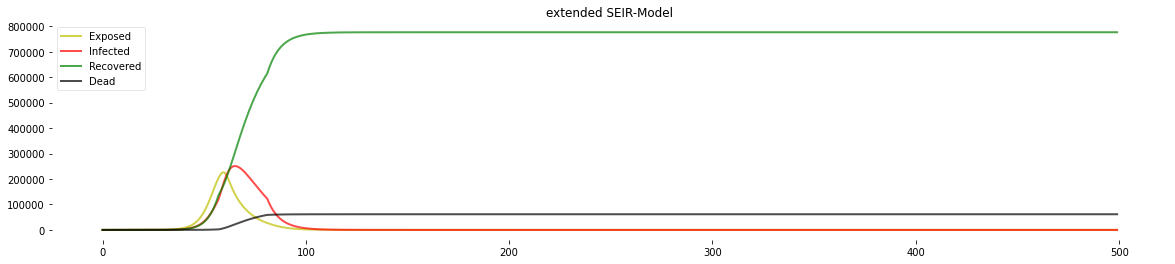

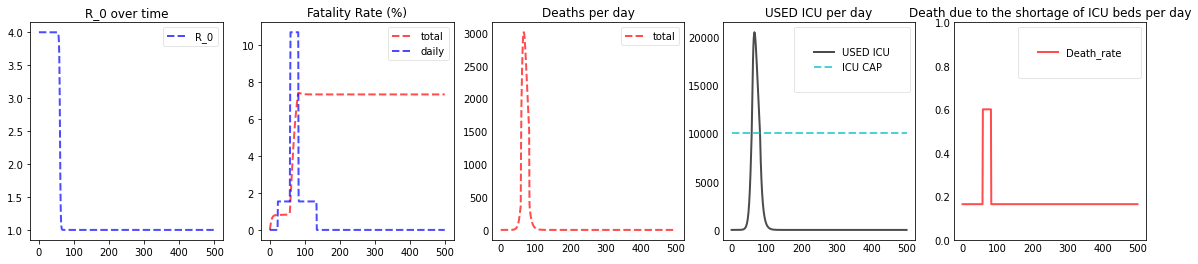

In [401]:
plotter(ICU_BEDS, *Model(days=500, agegroups=[100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000],
                 R_0_start=4.0, k=1.0, x0=60, R_0_end=1.0, inf_to_dead_p=0.08))

#Fitting

In [417]:
# parameters
data = covid_data[covid_data["Country/Region"] == "Germany"]["Value"].values[::-1]
agegroups = agegroup_lookup["Germany"]
#beds_per_100k = beds_lookup["Germany"]
outbreak_shift =30
params_init_min_max = {"R_0_start": (2.4, 1.5, 3.3), "k": (2.5, 0.01, 5.0), "x0": (90, 0, 120), "R_0_end": (2.4, 0.1, 3.3),
                      "inf_to_dead_p": (0.16, 0.01, 1)}  # form: {parameter: (initial guess, minimum value, max value)}

In [444]:
days = outbreak_shift + len(data)
if outbreak_shift >= 0:
    y_data = np.concatenate((np.zeros(outbreak_shift), data))
else:
    y_data = y_data[-outbreak_shift:]

x_data = np.linspace(0, days - 1, days, dtype=int)  # x_data is just [0, 1, ..., max_days] array

In [419]:
def fitter(x, R_0_start, k, x0, R_0_end, inf_to_dead_p):
    ret = Model(days, agegroups, R_0_start, k, x0, R_0_end, inf_to_dead_p)
    return ret[5][x]

In [420]:
mod = lmfit.Model(fitter)

for kwarg, (init, mini, maxi) in params_init_min_max.items():
    mod.set_param_hint(str(kwarg), value=init, min=mini, max=maxi, vary=True)

params = mod.make_params()
fit_method = "leastsq"

In [421]:
result = mod.fit(y_data, params, method="least_squares", x=x_data)

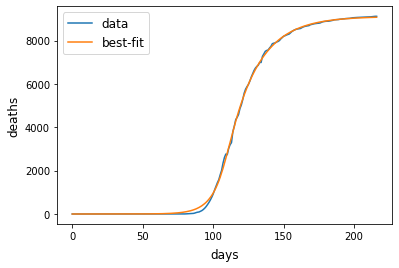

In [443]:
#result.plot_fit(datafmt="-");
plt.plot(x_data,y_data, label="data")
plt.plot(x_data, result.best_fit, label="best-fit" )
plt.xlabel('days', fontsize=12)
plt.ylabel('deaths', fontsize=12)
plt.legend(loc='best', fontsize=12)
ax = plt.gca()
ax.xaxis.set_label_coords(0.5, -0.11)
ax.yaxis.set_label_coords(-0.11, 0.5)
plt.show()

In [423]:
result.best_values

{'R_0_end': 0.49453922324255184,
 'R_0_start': 2.0764436432496187,
 'inf_to_dead_p': 0.16,
 'k': 0.48958867226252495,
 'x0': 106.3797485236913}

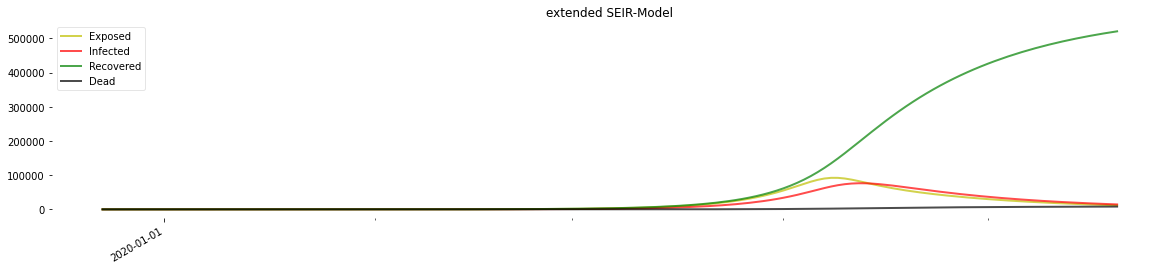

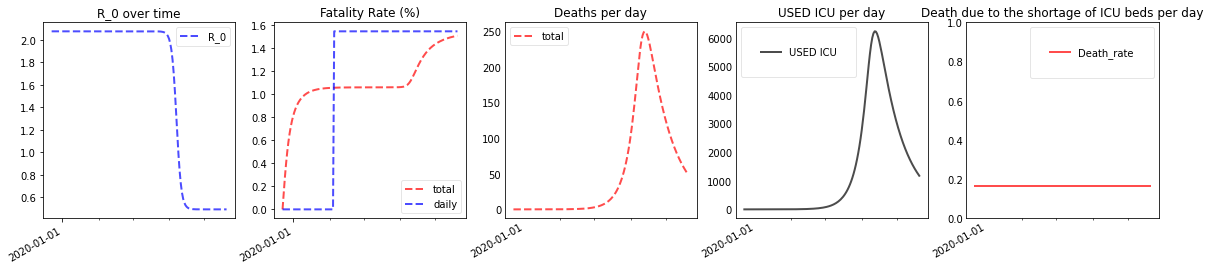

In [424]:
full_days =150
first_date = np.datetime64(covid_data.Date.min()) - np.timedelta64(outbreak_shift,'D')
#print(first_date)
x_ticks = pd.date_range(start=first_date, periods=full_days, freq='D')
#print("Prediction for Germany")
plotter(ICU_BEDS, *Model(full_days, agegroup_lookup["Germany"], **result.best_values), x_ticks=x_ticks);

# **4. SIMULATION**

---



In [445]:
def deriv(y, t, N, sus_to_exp_p, exp_to_inf_d, inf_to_rec_d, inf_to_dead_p, inf_to_dead_d):
    S, E, I, R, D = y

    sus_to_exp_p = sus_to_exp_p(t)

    sus_to_exp_p = change_exposed_prob(t,sus_to_exp_p )

    dSdt = -sus_to_exp_p * S * I / N
    dEdt = sus_to_exp_p * S * I / N - exp_to_inf_d * E
    dIdt = exp_to_inf_d * E - d_r_thresh(I) * inf_to_dead_d * I - (1 - d_r_thresh(I)) * inf_to_rec_d * I
    dRdt = (1 - d_r_thresh(I)) * inf_to_rec_d * I
    dDdt = d_r_thresh(I) * inf_to_dead_d * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [446]:
def logistic_R_0(t):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-(t)+x0))) + R_0_end

def sus_to_exp_p(t):
    return logistic_R_0(t) * inf_to_rec_d
    
def d_r_thresh(t):
  return 0.6 if t*0.17 * 0.48 > ICU_BEDS else inf_to_dead_p #Hospitalisation 

def change_exposed_prob(t,sus_to_exp_p):
  # back to normal
  # print(days_before_restr,restr_days,t)
  if t > days_before_restr + restr_days or t < days_before_restr:
    return sus_to_exp_p
  # apply restrictions
  elif t > days_before_restr and maske:
    return sus_to_exp_p  * mask(scenario)
  elif t > days_before_restr:
    return sus_to_exp_p * scenario()
  print('no')


In [447]:
# SocialReduction = 0%/25%/75%/90% <-- full lockdown not realistic
#
#
# mask:~12% 
# https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0009018
# https://pubmed.ncbi.nlm.nih.gov/22280120/	
from google.colab import files
def SR_0(): return 1
def SR_25(): return .75
def SR_50(): return .5
def SR_75(): return .25
def SR_90(): return .1
def mask(scenario): return scenario()*0.88
def Days_25(): return 0.25
def Days_50(): return 0.5
def Days_0(): return 0.0
def Days_full(): return 1

DURATION = [Days_0, Days_25, Days_50, Days_full]
SCENARIOS =  [SR_25, SR_50, SR_75, SR_90]

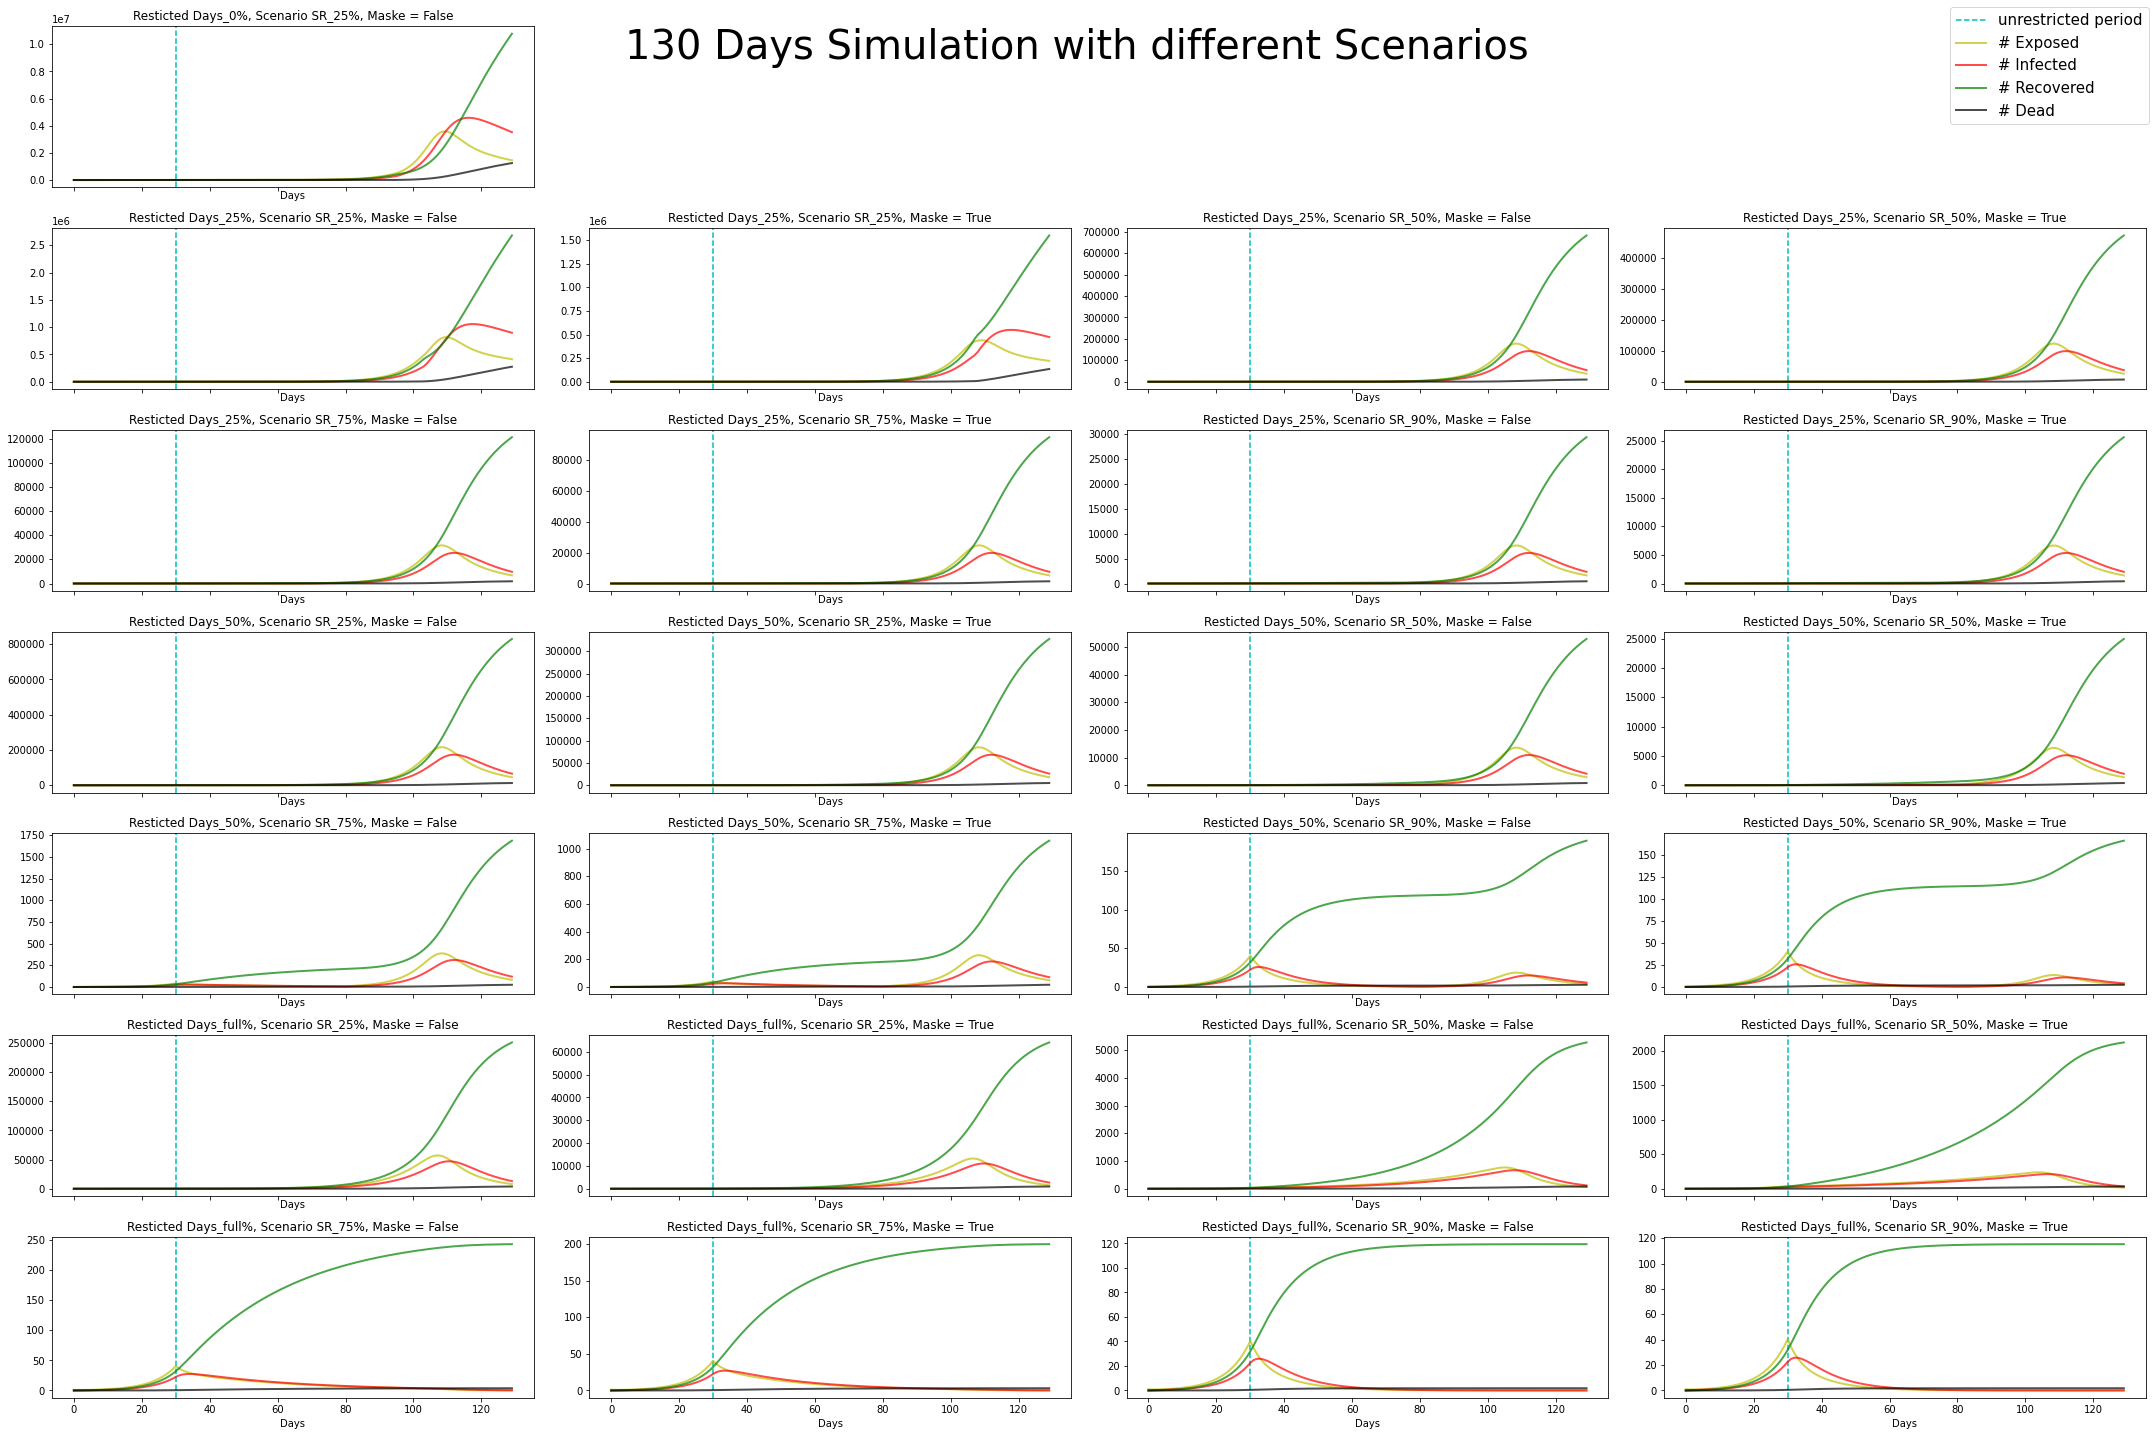

In [448]:
# inital values
N = 82_000_000
s = 0.01
exp_to_inf_d = 1.0 / 5.0
inf_to_rec_d = 1.0/4.0
ICU_BEDS = 24_000
days_before_restr = 30
sim_days = 130
t = np.linspace(0, sim_days-1, sim_days)
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0
inf_to_dead_d = 1/50  # 9 days from infection until death

# fitted values
inf_to_dead_p = 0.16
R_0_start, k, x0, R_0_end = 2.482919444855883, 0.4699616537520523, 107.17648503183233,0.34274130688083987

fig, axs = plt.subplots(7,4, figsize=(30, 20), facecolor='w', edgecolor='k', sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
i = 0
go_next = False
for days in DURATION:
  go_next = False
  for scenario in SCENARIOS:
    if(go_next):break
    for maske in [False, True]:
      # print(f'{days.__name__}, Scenario {scenario.__name__}, Maske = {maske} ')
      restr_days = round((sim_days-days_before_restr) * days())
      y0 = S0, E0, I0, R0, D0
      ret = odeint(deriv, y0, t, args=(N, sus_to_exp_p, exp_to_inf_d, inf_to_rec_d, inf_to_dead_p, inf_to_dead_d))
      S, E, I, R, D = ret.T
      # plotting
      # axs[i].plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
      axs[i].axvline(x=days_before_restr, color='c', linestyle='--', label = 'unrestricted period')
      axs[i].plot(t, E, 'y', alpha=0.7, linewidth=2, label='# Exposed')
      axs[i].plot(t, I, 'r', alpha=0.7, linewidth=2, label='# Infected')
      axs[i].plot(t, R, 'g', alpha=0.7, linewidth=2, label='# Recovered')
      axs[i].plot(t, D, 'k', alpha=0.7, linewidth=2, label='# Dead')

      #axs[i].plot(t, S+E+I+R+D, 'c--', alpha=0.7, linewidth=2, label='Total')
      axs[i].set_xlabel(f'Days')
      # axs[i].set_ylim([0,600_000])

      #axs[i].grid(b=True, which='major', c='w', lw=2, ls='-')
      axs[i].set_title(f'Resticted {days.__name__}%, Scenario {scenario.__name__}%, Maske = {maske}')
      # legend = axs[i].legend(borderpad=2.0)
      # legend.get_frame().set_alpha(0.5)
      i += 1
      if(str(days.__name__) == 'Days_0'):
        go_next = True
        i += 3
        break
fig.suptitle(f'{sim_days} Days Simulation with different Scenarios', fontsize=40)
handles, labels = axs[i-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', prop={'size': 15})
for num in [1,2,3]:
  fig.delaxes(axs[num])

plt.tight_layout()
#plt.savefig('simus.pdf')
#files.download('simus.pdf')
plt.show()